# Face Identification using Azure Face API

In [1]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO

In [2]:
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person, QualityForRecognition

In [3]:
# This key will serve all examples in this document.
#ahsan key
#KEY = ""

#glendor key
KEY = ""


# This endpoint will be used in all examples in this quickstart.
#ENDPOINT = "https://face-recognition-glendor.cognitiveservices.azure.com/"
ENDPOINT = "https://faceapiinterns2022.cognitiveservices.azure.com/"

In [4]:
# Base url for the Verify and Facelist/Large Facelist operations
IMAGE_BASE_URL = 'https://csdx.blob.core.windows.net/resources/Face/Images/'

# Used in the Person Group Operations and Delete Person Group examples.
# You can call list_person_groups to print a list of preexisting PersonGroups.
# SOURCE_PERSON_GROUP_ID should be all lowercase and alphanumeric. For example, 'mygroupname' (dashes are OK).
PERSON_GROUP_ID = str(uuid.uuid4()) # assign a random ID (or name it anything)

# Used for the Delete Person Group example.
TARGET_PERSON_GROUP_ID = str(uuid.uuid4()) # assign a random ID (or name it anything)


# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

Single image of JF Kennedy to test

In [5]:
single_face_image_url = 'https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg'
single_image_name = os.path.basename(single_face_image_url)

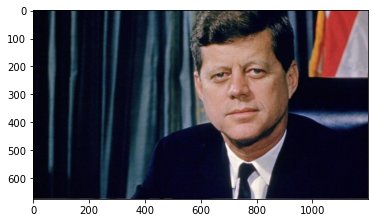

In [6]:
from skimage import io
import matplotlib.pyplot as plt

image = io.imread("https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg")
plt.imshow(image)
plt.show()

In [7]:
PERSON_GROUP_ID

'd3fcf3bd-28bc-4ac8-9f2d-62e009d66643'

In [8]:
'''
Create/Train/Detect/Identify Person Group
This example creates a Person Group, then trains it. It can then be used to detect and identify faces in other group images.
'''
print('-----------------------------')
print()
print('PERSON GROUP OPERATIONS')
print()

-----------------------------

PERSON GROUP OPERATIONS



# Create the PersonGroup

In [9]:
'''
Create the PersonGroup
'''
# Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
print('Person group:', PERSON_GROUP_ID)
face_client.person_group.create(person_group_id=PERSON_GROUP_ID, name=PERSON_GROUP_ID)

# Define obama friend
obama = face_client.person_group_person.create(PERSON_GROUP_ID, "obama")
# Define kennedy friend
kennedy = face_client.person_group_person.create(PERSON_GROUP_ID, "kennedy")
# Define bush friend
bush = face_client.person_group_person.create(PERSON_GROUP_ID, "bush")

Person group: d3fcf3bd-28bc-4ac8-9f2d-62e009d66643


In [10]:
bush

# Detect faces and register to correct person

In [11]:
'''
Detect faces and register to correct person
'''
# Find all jpeg images of friends in working directory
obama_images = [file for file in glob.glob('*.jpg') if file.startswith("obama")]
kennedy_images = [file for file in glob.glob('*.jpg') if file.startswith("kennedy")]
bush_images = [file for file in glob.glob('*.jpg') if file.startswith("bush")]

In [12]:
w = open(obama_images[0], 'r+b')


# TEST

# FIXED PERSON GROUP

In [14]:
# Add to a obama person
for image in obama_images:
    w = open(image, 'r+b')
    # Check if the image is of sufficent quality for recognition.
    """
    sufficientQuality = True
    detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
    for face in detected_faces:
        if face.face_attributes.quality_for_recognition != QualityForRecognition.high:
            sufficientQuality = False
            break
    if not sufficientQuality: continue
    """
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, obama.person_id, w, detection_model='detection_03', recognition_model='recognition_04')

# Add to a kennedy person
for image in kennedy_images:
    m = open(image, 'r+b')
    # Check if the image is of sufficent quality for recognition.
    """
    sufficientQuality = True
    detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
    for face in detected_faces:
        if face.face_attributes.quality_for_recognition != QualityForRecognition.high:
            sufficientQuality = False
            break
    if not sufficientQuality: continue
    """
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, kennedy.person_id, m,  detection_model='detection_03', recognition_model='recognition_04')

# Add to a bush person
for image in bush_images:
    ch = open(image, 'r+b')
    # Check if the image is of sufficent quality for recognition.
    """
    sufficientQuality = True
    detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03', recognition_model='recognition_04', return_face_attributes=['qualityForRecognition'])
    for face in detected_faces:
        if face.face_attributes.quality_for_recognition != QualityForRecognition.high:
            sufficientQuality = False
            break
    if not sufficientQuality: continue
    """
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, bush.person_id, ch,  detection_model='detection_03', recognition_model='recognition_04')

# Train PersonGroup

In [15]:
'''
Train PersonGroup
'''
print()
print('Training the person group...')
# Train the person group
face_client.person_group.train(PERSON_GROUP_ID)

while (True):
    training_status = face_client.person_group.get_training_status(PERSON_GROUP_ID)
    print("Training status: {}.".format(training_status.status))
    print()
    if (training_status.status is TrainingStatusType.succeeded):
        break
    elif (training_status.status is TrainingStatusType.failed):
        face_client.person_group.delete(person_group_id=PERSON_GROUP_ID)
        sys.exit('Training the person group has failed.')
    time.sleep(5)
    



Training the person group...
Training status: running.

Training status: succeeded.



# Identify a face against a defined PersonGroup

Loading single test image

In [53]:
'''
Identify a face against a defined PersonGroup
'''
# Group image for testing against
test_image_array = glob.glob('test_3.jpeg')

In [54]:
image = open(test_image_array[0], 'r+b')

In [55]:
test_image_array[0]

'test_3.jpeg'

## Detecting and isolating faces

In [56]:
#print('Pausing for 60 seconds to avoid triggering rate limit on free account...')
#time.sleep (60)

# Detect faces
face_ids = []
# We use detection model 3 to get better performance, recognition model 4 to support quality for recognition attribute.
faces = face_client.face.detect_with_stream(image, detection_model='detection_03')
for face in faces:
    # Only take the face if it is of sufficient quality.
    #if face.face_attributes.quality_for_recognition == QualityForRecognition.high or face.face_attributes.quality_for_recognition == QualityForRecognition.medium:
    face_ids.append(face.face_id)

## Identifying the faces

In [57]:
results = face_client.face.identify(face_ids, PERSON_GROUP_ID)

In [59]:
# Identify faces
results = face_client.face.identify(face_ids, PERSON_GROUP_ID)
print('Identifying faces in {}'.format(os.path.basename(image.name)))
if not results:
    print('No person identified in the person group for faces from {}.'.format(os.path.basename(image.name)))
for person in results:
    if len(person.candidates) > 0:
        #print('Person for face ID {} is identified in {} with a confidence of {}.'.format(person.face_id, os.path.basename(image.name), person.candidates[0].confidence)) # Get topmost confidence score
        print('Person for face ID {} is identified in {} with a confidence of {} for person {}.'.format(person.face_id, os.path.basename(image.name), person.candidates[0].confidence, person.candidates[0].person_id)) # Get topmost confidence score
    else:
        print('No person identified for face ID {} in {}.'.format(person.face_id, os.path.basename(image.name)))
print()
'''
END - Create/Train/Detect/Identify Person Group
'''

print()
print('-----------------------------')


Identifying faces in test_3.jpeg
Person for face ID 035d0ce4-9478-421f-9b65-5c451f921eee is identified in test_3.jpeg with a confidence of 0.78952 for person 72d62952-ad1c-4f97-9046-f34295cc3c14.


-----------------------------


In [47]:
obama.person_id

'72d62952-ad1c-4f97-9046-f34295cc3c14'

In [25]:
bush.person_id

'426461cb-fc42-48af-b6ca-eb12079fee30'

In [27]:
kennedy.person_id

'a856883f-ea9f-4be4-b576-bfcd07631579'